In [47]:
# start by importing our libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

# now import functions we are going to use
from test_functions import *
from ga import *
from lm import *
from leapfrog import *
from isd import *
from hooke_jeeves import *

# add our functions and optimizers
functions = [ackley, beale, booth, goldstein, rosenbrock, sphere]
optimizers = [hooke_jeeves, isd, leapfrog, lm, ga]
opt_names = ['HJ', 'ISD', "LF", "LM", "GA"]

"\nx = np.outer(np.linspace(-5.12, 5.12, 100), np.ones(100))\ny = x.copy().T\nz = x**2 + y**2\n\nfig = plt.figure()\nax = plt.axes(projection='3d')\nax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)\n\nplt.figure()\nCS = plt.contour(x, y, z)\n"

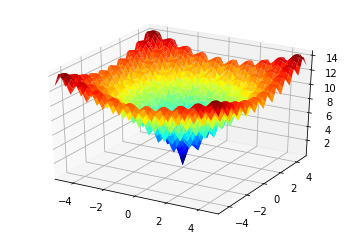

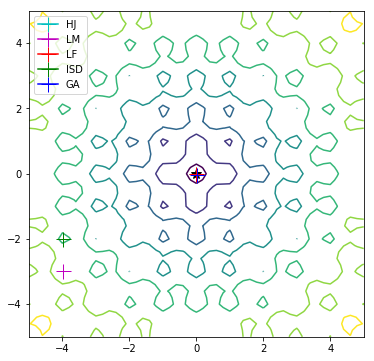

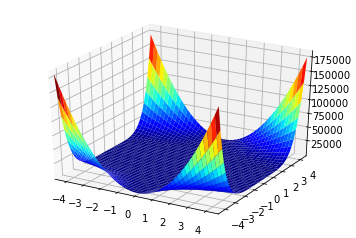

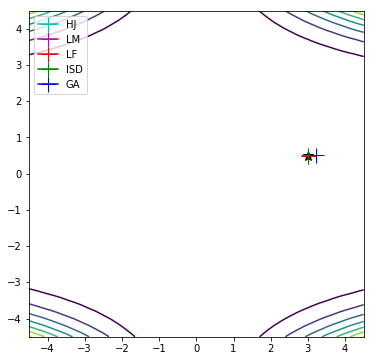

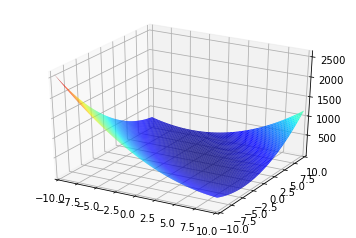

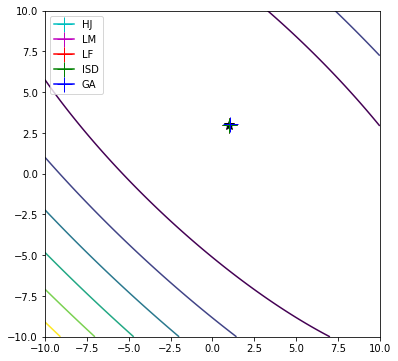

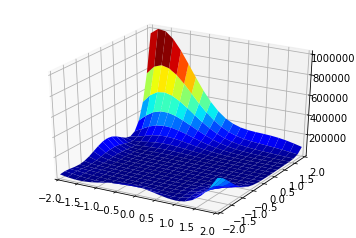

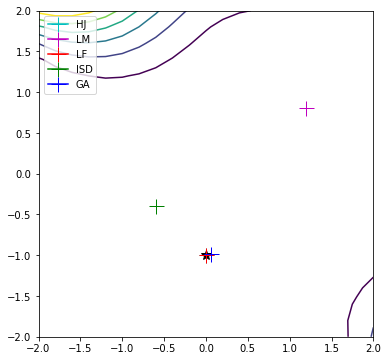

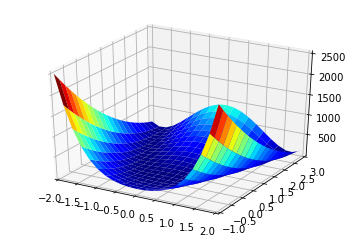

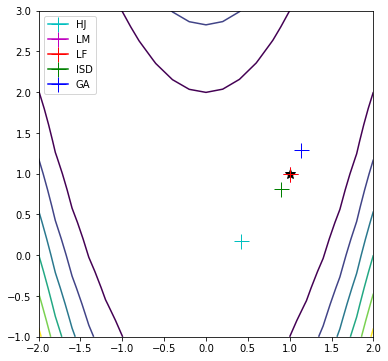

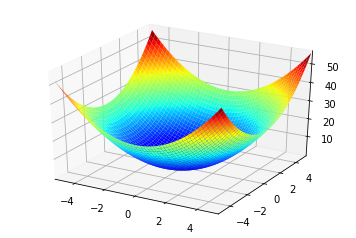

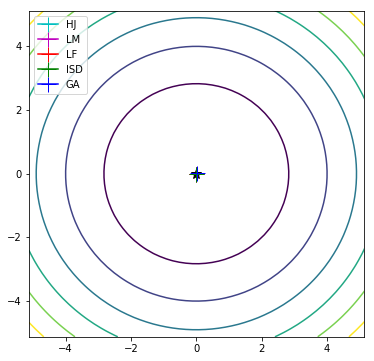

In [50]:
# Plotting the each function 

for f in functions:
    xmin, xmax, ymin, ymax = get_range(f)
    real_min = get_final_min(f)
    real_coords = get_final_coords(f)
    xstep = .2
    ystep = .2
    x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
    z = f(x,y)
    
    # get points for each optimizer and store in dictionary
    points ={}
    for opt, name in zip(optimizers, opt_names):
        
        tmin, xy = opt(f,verbose=True)
        
        points[name] = (xy)
    
    
        
        
    # plot 3d 
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)

    # plot contour
    fig, cs = plt.subplots(figsize=(6, 6))
    cs.set_xlim([xmin,xmax])
    cs.set_ylim([ymin,ymax])
    cs.contour(x, y, z)
    cs.plot(real_coords[0], real_coords[1], 'k*', markersize=10)
    
    # plot the best points of each function
    colors = ['b','g','r','m','c']
    for keys, pts in points.items():
        px, py = zip(pts) # unpack
        cs.plot(px, py, label=keys,marker='+', color=colors.pop(),markersize=15)
    cs.legend(loc='upper left')

